(iir-filters)=
# IIR filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
# %matplotlib widget
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

## Create an IIR filter

The user creates an IIR filter with the {obj}`sdr.IIR` class by specifying the feedforward coefficients $b_i$
and feedback coefficients $a_j$.

Below is an IIR filter with one real zero and one complex pole.

In [2]:
zero = 0.6
pole = 0.8 * np.exp(1j * np.pi / 8)
iir = sdr.IIR.ZerosPoles([zero], [pole, pole.conj()])
print(iir)

In [3]:
print(f"Feedforward taps: {iir.b_taps}")
print(f"Feedback taps: {iir.a_taps}")

Feedforward taps: [ 1. +0.j -0.6+0.j]
Feedback taps: [ 1.       +0.j -1.4782072+0.j  0.64     +0.j]


## Examine the impulse response, $h[n]$

The impulse response of the IIR filter is computed and returned from the {meth}`sdr.IIR.impulse_response()` method.
The impulse response $h[n]$ is the output of the filter when the input is an impulse $\delta[n]$.

In [4]:
h = iir.impulse_response(30)
print(h)

[ 1.00000000e+00+0.j  8.78207207e-01+0.j  6.58172257e-01+0.j
  4.10862390e-01+0.j  1.86109520e-01+0.j  1.21565149e-02+0.j
 -1.01140242e-01+0.j -1.57286407e-01+0.j -1.67772150e-01+0.j
 -1.47338707e-01+0.j -1.10422969e-01+0.j -6.89312603e-02+0.j
 -3.12239890e-02+0.j -2.03952069e-03+0.j  1.69685183e-02+0.j
  2.63882796e-02+0.j  2.81474943e-02+0.j  2.47193310e-02+0.j
  1.85258979e-02+0.j  1.15647447e-02+0.j  5.23851487e-03+0.j
  3.42174108e-04+0.j -2.84684520e-03+0.j -4.42721858e-03+0.j
 -4.72236563e-03+0.j -4.14721519e-03+0.j -3.10812955e-03+0.j
 -1.94024191e-03+0.j -8.78876751e-04+0.j -5.74071747e-05+0.j]


The impulse response is conveniently plotted using the {obj}`sdr.IIR.plot_impulse_response()` method.

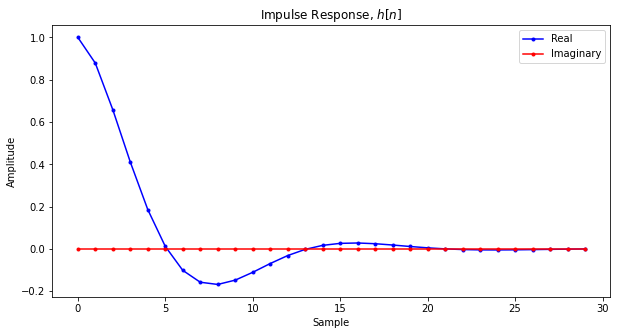

In [5]:
plt.figure(figsize=(10, 5))
iir.plot_impulse_response(30)
plt.show()

## Examine the step response, $s[n]$

The step response of the IIR filter is computed and returned from the {meth}`sdr.IIR.step_response()` method.
The step response $s[n]$ is the output of the filter when the input is a unit step $u[n]$.

In [6]:
s = iir.step_response(30)
print(s)

[1.        +0.j 1.87820721+0.j 2.53637946+0.j 2.94724185+0.j
 3.13335137+0.j 3.14550789+0.j 3.04436765+0.j 2.88708124+0.j
 2.71930909+0.j 2.57197038+0.j 2.46154741+0.j 2.39261615+0.j
 2.36139217+0.j 2.35935264+0.j 2.37632116+0.j 2.40270944+0.j
 2.43085694+0.j 2.45557627+0.j 2.47410217+0.j 2.48566691+0.j
 2.49090543+0.j 2.4912476 +0.j 2.48840075+0.j 2.48397354+0.j
 2.47925117+0.j 2.47510395+0.j 2.47199583+0.j 2.47005558+0.j
 2.46917671+0.j 2.4691193 +0.j]


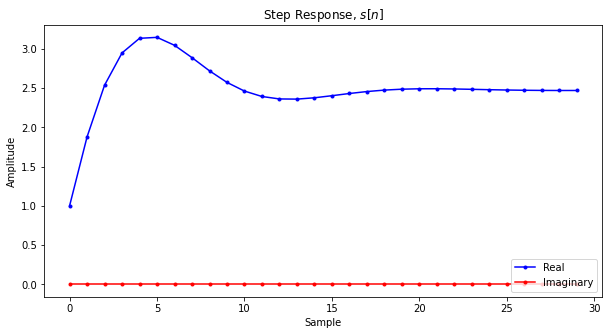

In [7]:
plt.figure(figsize=(10, 5))
iir.plot_step_response(30)
plt.show()

## Examine the zeros and poles

Zeros are $z$ values that set the numerator of $H(z)$ to zero.

In [8]:
print(iir.zeros)

[0.6-0.j]


Poles are $z$ values that set the denominator of $H(z)$ to zero.
The poles define the stability of the IIR filter.

In [9]:
print(iir.poles)

[0.7391036+0.30614674j 0.7391036-0.30614674j]


The zeros and poles are conveniently plotted in the complex plane using the {obj}`sdr.IIR.plot_zeros_poles()` method.

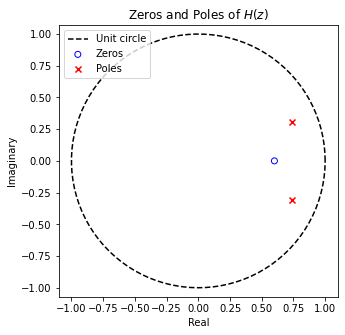

In [10]:
plt.figure(figsize=(5, 5))
iir.plot_zeros_poles()
plt.show()

## Examine the frequency response, $H(\omega)$

The frequency response is the transfer function $H(z)$ evaluated at the complex exponential
$e^{j \omega}$, where $\omega = 2 \pi f / f_s$.

The frequency response is conveniently plotted using the {obj}`sdr.IIR.plot_frequency_response()` method.

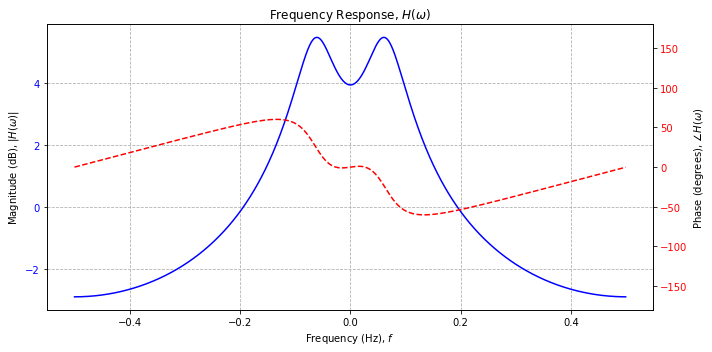

In [11]:
plt.figure(figsize=(10, 5))
iir.plot_frequency_response()
plt.show()

## Examine the group delay, $\tau_g(\omega)$

The group delay $\tau_g(\omega)$ is the time shift of the envelope of a signal passed through the filter
as a function of its frequency $\omega$.

The group delay is conveniently plotted using the {obj}`sdr.IIR.plot_group_delay()` method.

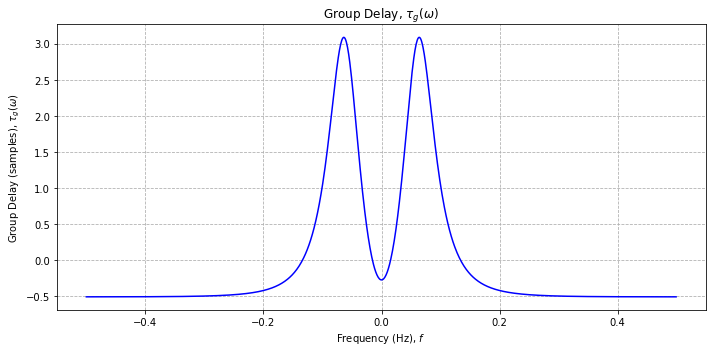

In [12]:
plt.figure(figsize=(10, 5))
iir.plot_group_delay()
plt.show()

## Fully analyze an IIR filter

The user can easily analyze the perform of a given IIR filter using the {meth}`sdr.IIR.plot_all()` method.

Here is an IIR filter with one real zero and 8 complex poles.

In [13]:
zeros = np.array([0.8])
poles = 0.6 * np.exp(1j * np.linspace(np.pi / 8, np.pi / 4, 4, endpoint=False))
poles = np.concatenate((poles, poles.conj()))
iir = sdr.IIR.ZerosPoles(zeros, poles)
print(iir)

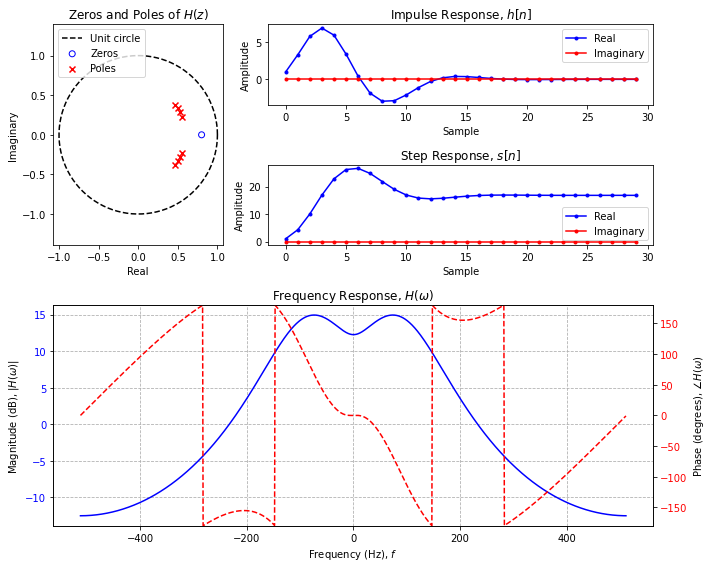

In [14]:
plt.figure(figsize=(10, 8))
iir.plot_all(N_time=30)
plt.show()

## Poles and digital filter stability

Reference:
- R. Lyons, Understanding Digital Signal Processing 3rd Edition, Section 6.3.1.

When the pole is real and inside the unit circle, the impulse response $h[n]$ is an exponential decay.

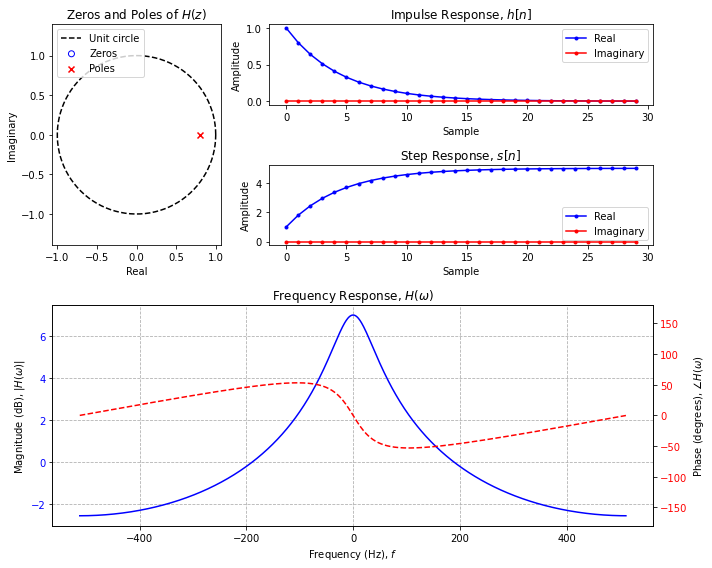

In [15]:
zeros = []
poles = [0.8]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
iir.plot_all(N_time=30)
plt.show()

When the poles are complex conjugates and inside the unit circle, the impulse response $h[n]$ is a decaying sinusoid.

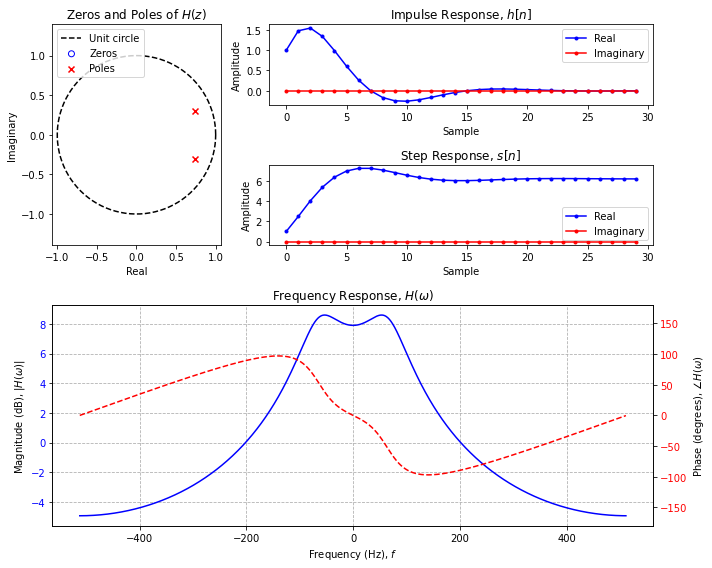

In [16]:
zeros = []
pole = 0.8 * np.exp(1j * np.pi / 8)
poles = [pole, pole.conj()]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
iir.plot_all(N_time=30)
plt.show()

When the pole is real and on the unit circle, the impulse response $h[n]$ is constant.
This filter is an integrator.

C:\Users\matth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\signal\filter_design.py:476: RuntimeWarning: divide by zero encountered in true_divide
  npp_polyval(zm1, a, tensor=False))
C:\Users\matth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\scipy\signal\filter_design.py:476: RuntimeWarning: invalid value encountered in true_divide
  npp_polyval(zm1, a, tensor=False))


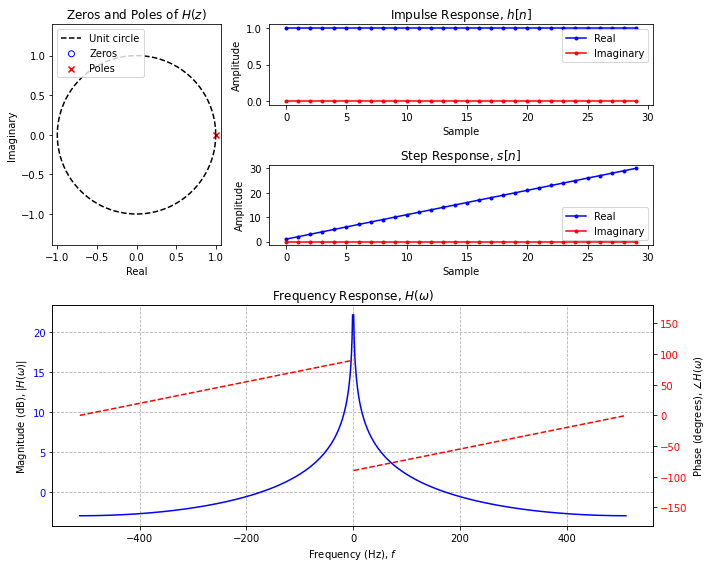

In [17]:
zeros = []
poles = [1]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
iir.plot_all(N_time=30)
plt.show()

When the poles are complex conjugates and on the unit circle, the impulse response $h[n]$ is a sinusoid.

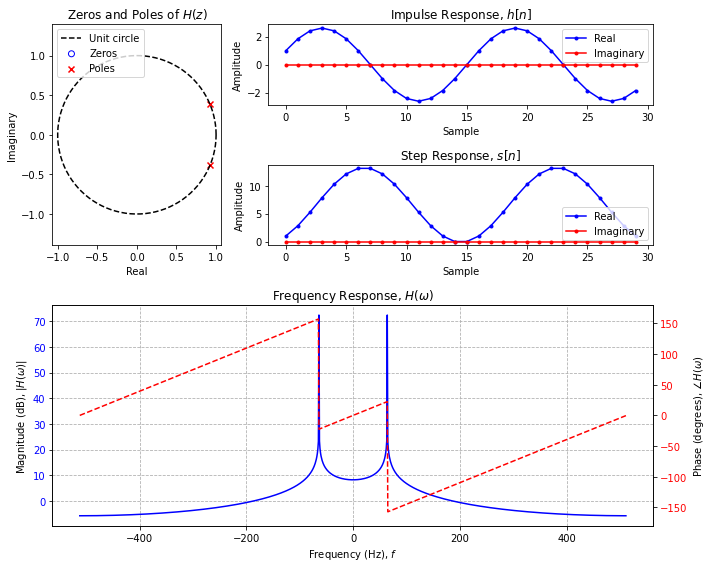

In [18]:
zeros = []
pole = 1 * np.exp(1j * np.pi / 8)
poles = [pole, pole.conj()]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
iir.plot_all(N_time=30)
plt.show()

When the pole is real and outside the unit circle, the impulse response $h[n]$ is an exponential.
This filter is unstable.

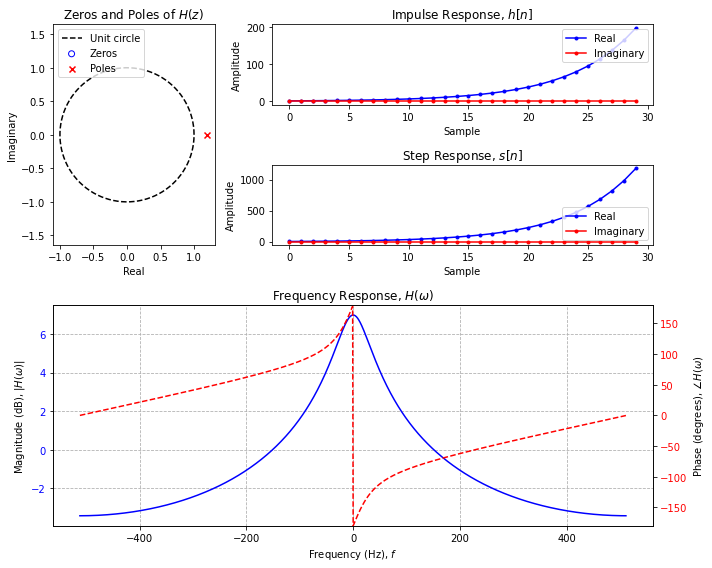

In [19]:
zeros = []
poles = [1.2]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
iir.plot_all(N_time=30)
plt.show()

When the poles are complex conjugates and outside the unit circle,
the impulse response $h[n]$ is an exponentially-increasing sinusoid.
This filter is unstable.

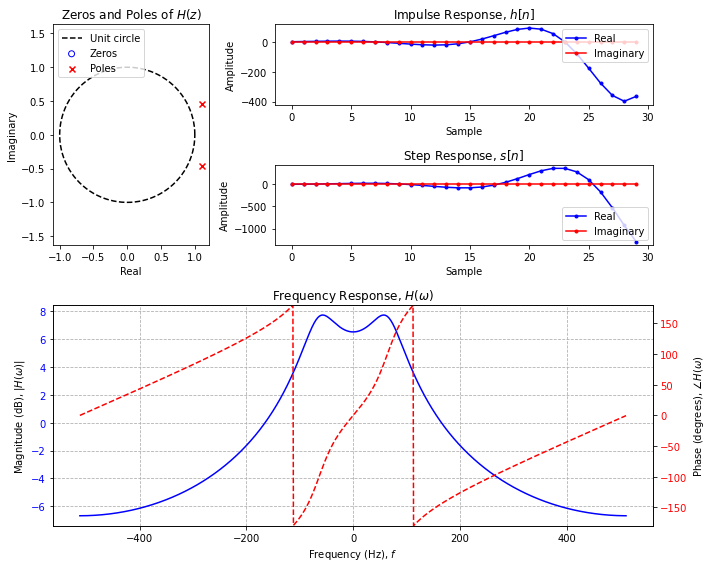

In [20]:
zeros = []
pole = 1.2 * np.exp(1j * np.pi / 8)
poles = [pole, pole.conj()]
iir = sdr.IIR.ZerosPoles(zeros, poles)

plt.figure(figsize=(10, 8))
iir.plot_all(N_time=30)
plt.show()